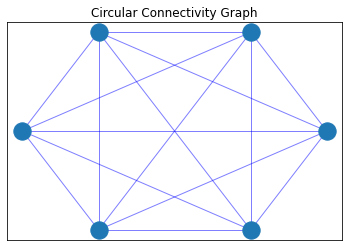

In [2]:
# 导入所需的库
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# 读取连接矩阵
# 假设你的连接矩阵保存在变量connection_matrix中
connection_matrix = np.random.randn(6,6)  # 替换为你的矩阵

# 创建一个图对象
G = nx.Graph()

# 添加节点和边
num_nodes = len(connection_matrix)
G.add_nodes_from(range(num_nodes))
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if connection_matrix[i][j] != 0:  # 假设0表示没有连接
            G.add_edge(i, j, weight=connection_matrix[i][j])

# 为节点设置环形布局
pos = nx.circular_layout(G)

# 绘制节点
nx.draw_networkx_nodes(G, pos)

# 绘制边
edges = nx.draw_networkx_edges(G, pos, edge_color='blue', alpha=0.5)

# 显示图表
plt.title('Circular Connectivity Graph')
plt.show()

In [4]:
import os 
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation
# 假设你的连接矩阵是numpy数组，存储在变量matrix中
sim_dir = '/nfs/z1/userhome/GongZhengXin/NVP/NaturalObject/data/code/nodretinotopy/mfm_locwise_fullpipeline/anal/voxel-tuning-similarity'
matrix = np.load(os.path.join(sim_dir, 'sub-04_bm-primaryvis-in-MMP_layer-googlenet-inception3a_tuningsim.npy'))  # 替换为你的矩阵文件路径

# 创建基本的环形图对象
gd_diagram = GenomeDiagram.Diagram("Circos Plot")

# 为图表添加轨道
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")

# 为轨道添加集
gd_feature_set = gd_track_for_features.new_set()

# 添加特征和连接线
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if matrix[i][j] > 0 and i < j:  # 设置阈值以筛选重要的连接
            feature = SeqFeature(FeatureLocation(i, j), strand=+1)
            gd_feature_set.add_feature(feature, color="blue", label=True)

# 绘制图形
gd_diagram.draw(format="circular", circular=True, pagesize=(20*cm,20*cm),
                start=0, end=len(matrix), circle_core=0.7)

# 保存为PDF或PNG
save_path = '/nfs/z1/userhome/GongZhengXin/NVP/NaturalObject/data/code/nodretinotopy/mfm_locwise_fullpipeline/vis'
gd_diagram.write(os.path.join(save_path, "circos_plot.pdf"), "PDF")
gd_diagram.write(os.path.join(save_path,"circos_plot.png"), "PNG")

NameError: name 'cm' is not defined